# Assignment Day 7

Problem Statement¶
A sizable department has to be maintained, for the purposes of recruiting new talent
More often than not, the new employees have to be trained for the job and/or given time toacclimatize themselves to the company
Hence, the management has contracted an HR analytics firm to understand what factors theyshould focus on, in order to curb attrition.
In other words, they want to know what changes they should make to their workplace, in order toget most of their employees to stay.
Also, they want to know which of these variables is most important and needs to be addressedright away.

In [46]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
df=pd.read_csv("general_data.csv") 
df.head(4)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5


In [47]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [48]:
df["NumCompaniesWorked"].fillna(df['NumCompaniesWorked'].mean(),inplace=True)
df["TotalWorkingYears"].fillna(df['TotalWorkingYears'].mean(),inplace=True)

In [49]:
df.sort_values("EmployeeID", inplace = True) 
  
# dropping ALL duplicte values 
df.drop_duplicates(subset ="EmployeeID", 
                     keep = False, inplace = True) 



In [50]:
df.drop(['EmployeeID', 'EmployeeCount','Over18'],axis=1,inplace=True)
df.head(4)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,131160,1.0,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,41890,0.0,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,193280,1.0,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,83210,3.0,11,8,3,13.0,5,8,7,5


In [51]:
df.describe()

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,1.106689,47068.888559,2.493497,3.659108,0.0,0.851883,7.774275,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


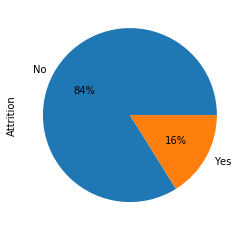

In [52]:
df.Attrition.value_counts().plot(kind='pie', autopct = "%1.0f%%")

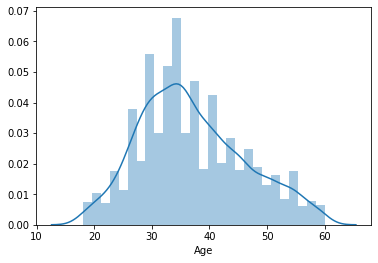

In [53]:
sns.distplot(df.Age)

{'whiskers': [<matplotlib.lines.Line2D at 0x209c86a0a48>,
 'caps': [<matplotlib.lines.Line2D at 0x209c86a0bc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x209c86a0148>],
 'medians': [<matplotlib.lines.Line2D at 0x209c86a7fc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x209c86a7bc8>],
 'means': []}

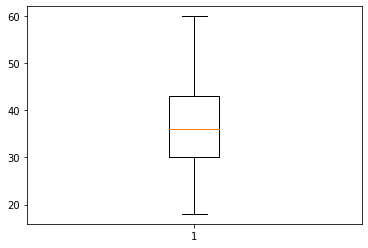

In [54]:
plt.boxplot(df['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x209c8700c88>,
 'caps': [<matplotlib.lines.Line2D at 0x209c8700e08>,
 'boxes': [<matplotlib.lines.Line2D at 0x209c87004c8>],
 'medians': [<matplotlib.lines.Line2D at 0x209c8705f48>],
 'fliers': [<matplotlib.lines.Line2D at 0x209c870bac8>],
 'means': []}

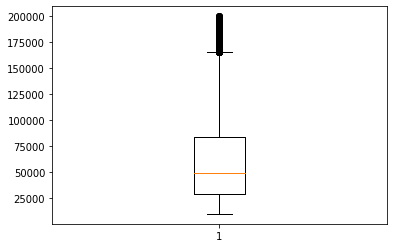

In [55]:
plt.boxplot(df['MonthlyIncome'])

{'whiskers': [<matplotlib.lines.Line2D at 0x209c8758c48>,
 'caps': [<matplotlib.lines.Line2D at 0x209c875bd88>,
 'boxes': [<matplotlib.lines.Line2D at 0x209c8753fc8>],
 'medians': [<matplotlib.lines.Line2D at 0x209c8762e88>],
 'fliers': [<matplotlib.lines.Line2D at 0x209c8762f88>],
 'means': []}

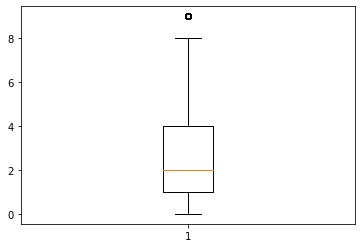

In [56]:
plt.boxplot(df['NumCompaniesWorked'])

{'whiskers': [<matplotlib.lines.Line2D at 0x209c87beb88>,
 'caps': [<matplotlib.lines.Line2D at 0x209c87c3c48>,
 'boxes': [<matplotlib.lines.Line2D at 0x209c87be148>],
 'medians': [<matplotlib.lines.Line2D at 0x209c87c6b08>],
 'fliers': [<matplotlib.lines.Line2D at 0x209c87c6c08>],
 'means': []}

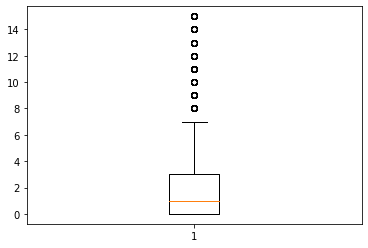

In [57]:
plt.boxplot(df['YearsSinceLastPromotion'])


So, from the above plots, we can conclude the following:

1)Graphs of Age and Education are normally distributed without any Outliers.

2)DistanceFromHome, PercentSalaryHike and Job graphs are Right Skewed without any Outliers.

3)MonthlyIncome,YearsAtCompany,YearsSinceLastPromotion and YearsWithCurrManager graphs are right Skewed with many Outliers.

4)Graph of TrainingTimesLastYear is normally distributed with many Outliers.